In [2]:
pip install pyspark

In [3]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("PySpark_Tutorial").getOrCreate())

In [4]:
spark

In [37]:
data = spark.read.csv("/content/job.csv", header=True, inferSchema=True)
print("Readin the ")
data.show(100)

Readin the 
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|                 GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|                 8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|                 8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Systems ...|
|        3|   Aditya|  

In [6]:
from pyspark.sql.functions import *
mode_data = data.select(mode("GPA")).collect()[0][0]
data = data.fillna({"GPA" : mode_data})
print("Filling null values of GPA")
data.show()


Filling null values of GPA
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|                 GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|                 8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|                 8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Systems ...|
|       

In [7]:
ie_data = data.fillna({"InternshipExperience" : 0})
print("Filling null values of InternshipExperience")
ie_data.show()

Filling null values of InternshipExperience
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|                 GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|                 8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|                 8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Syst

In [8]:
from pyspark.sql.functions import col, isnull
from pyspark.sql.types import *

# Define the expected schema
expected_schema = StructType([
    StructField("StudentID", IntegerType(), True),
    StructField("FirstName", StringType(), True),
    StructField("LastName", StringType(), True),
    StructField("Institute", StringType(), True),
    StructField("Major", StringType(), True),
    StructField("GPA", DoubleType(), True),
    StructField("GraduationYear", IntegerType(), True),
    StructField("Skills", StringType(), True),
    StructField("InternshipExperience", StringType(), True),
    StructField("ApplicationStatus", StringType(), True),
    StructField("PreferredRole", StringType(), True)
])


cleaned_data = data.withColumn("GPA_casted", col("GPA").cast(DoubleType()))\
                   .withColumn("GraduationYear_casted", col("GraduationYear").cast(IntegerType()))

filtered_data = cleaned_data.filter(col("GPA_casted").isNotNull() & col("GraduationYear_casted").isNotNull())

cleaned_data = filtered_data.select([col(field.name) for field in expected_schema.fields])


cleaned_data.show()

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Systems ...|
|        3|   Aditya|   Mishra|Indian Institute ...|Mechanical Engine...|7.8|        2024.0|CAD, SolidWorks, ...|       

In [9]:
iit_data = cleaned_data.filter(cleaned_data.Institute.startswith("Indian"))
iit_data.show()

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        3|   Aditya|   Mishra|Indian Institute ...|Mechanical Engine...|7.8|        2024.0|CAD, SolidWorks, ...|                  No|          Submitted| Mechanical Engineer|
|        4|   Ishita|     Jain|Indian Institute ...|    Computer Science|9.2|        2024.0|Machine Learning,...|       

In [10]:
gpa_data = iit_data.filter(iit_data.GPA >= 8.5)
gpa_data.show()
major_counts = gpa_data.groupBy("Major").count().withColumnRenamed("count", "Major_Count")
major_counts.show()

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        4|   Ishita|     Jain|Indian Institute ...|    Computer Science|9.2|        2024.0|Machine Learning,...|                 Yes|          In Review|      Data Scientist|
|       18|    Ankit|      Das|Indian Institute ...|    Computer Science|9.1|        2024.0|DevOps, AWS, Dock...|       

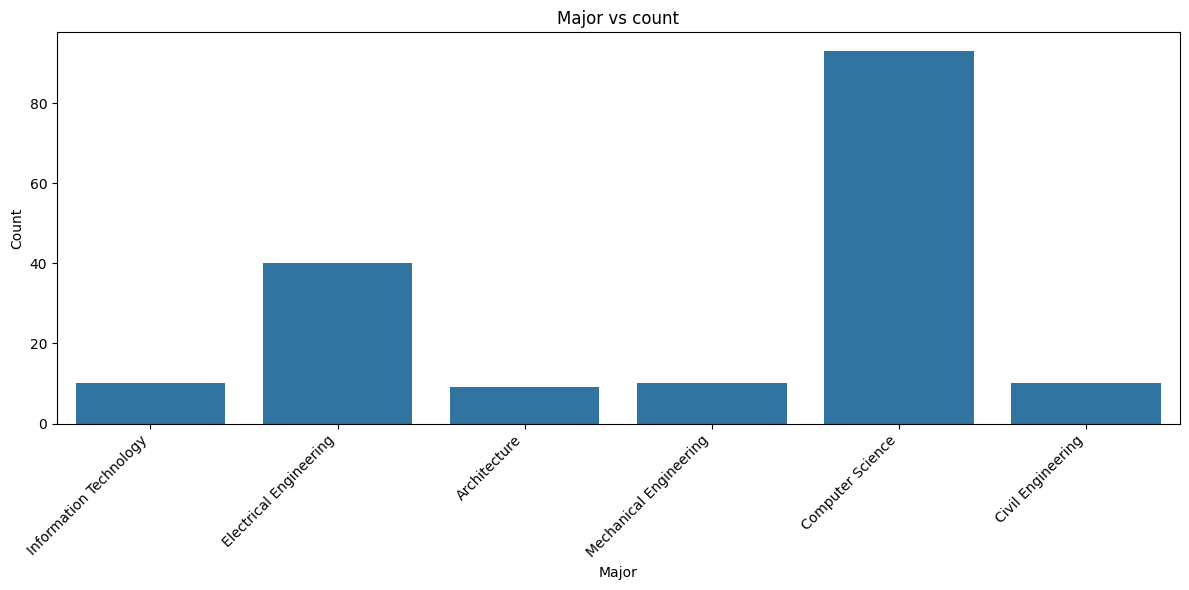

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iit_data_pd = major_counts.select("Major", "Major_Count").toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(data=iit_data_pd, x='Major', y='Major_Count')
plt.title('Major vs count')
plt.xlabel('Major')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Apply logistic regression to predict job eligibility based on GPA, Institute, and InternshipExperience.

## Prepare the target variable

### Subtask:
Create a binary target variable based on the 'ApplicationStatus' column, where 'eligible' is 1 and 'not eligible' is 0. You'll need to define which statuses are considered 'eligible'.


**Reasoning**:
Create a binary target variable 'eligible' based on the 'ApplicationStatus' column and display the updated dataframe schema and the first few rows.



In [12]:
eligible_statuses = ["Submitted", "In Review", "Interview Scheduled", "Accepted"]
cleaned_data = cleaned_data.withColumn(
    "eligible",
    when(col("ApplicationStatus").isin(eligible_statuses), 1).otherwise(0)
)
cleaned_data.printSchema()
cleaned_data.show()

root
 |-- StudentID: integer (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- Institute: string (nullable = true)
 |-- Major: string (nullable = true)
 |-- GPA: string (nullable = false)
 |-- GraduationYear: double (nullable = true)
 |-- Skills: string (nullable = true)
 |-- InternshipExperience: string (nullable = true)
 |-- ApplicationStatus: string (nullable = true)
 |-- PreferredRole: string (nullable = true)
 |-- eligible: integer (nullable = false)

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+--------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|eligible|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--

**Reasoning**:
The error indicates that `cleaned_data` DataFrame is not defined in the current scope. This is because the previous code cells were not executed in the current runtime. I need to re-execute the code to load and clean the data into the `cleaned_data` DataFrame before proceeding with creating the target variable.



In [14]:
from pyspark.sql.functions import col, isnull, when
from pyspark.sql.types import *

data = spark.read.csv("/content/job.csv", header=True, inferSchema=True)

mode_data = data.select(mode("GPA")).collect()[0][0]
data = data.fillna({"GPA" : mode_data})

ie_data = data.fillna({"InternshipExperience" : 0})
data = ie_data

expected_schema = StructType([
    StructField("StudentID", IntegerType(), True),
    StructField("FirstName", StringType(), True),
    StructField("LastName", StringType(), True),
    StructField("Institute", StringType(), True),
    StructField("Major", StringType(), True),
    StructField("GPA", DoubleType(), True),
    StructField("GraduationYear", IntegerType(), True),
    StructField("Skills", StringType(), True),
    StructField("InternshipExperience", StringType(), True),
    StructField("ApplicationStatus", StringType(), True),
    StructField("PreferredRole", StringType(), True)
])

cleaned_data = data.withColumn("GPA_casted", col("GPA").cast(DoubleType()))\
                   .withColumn("GraduationYear_casted", col("GraduationYear").cast(IntegerType()))

filtered_data = cleaned_data.filter(col("GPA_casted").isNotNull() & col("GraduationYear_casted").isNotNull())

cleaned_data = filtered_data.select([col(field.name) for field in expected_schema.fields])

eligible_statuses = ["Submitted", "In Review", "Interview Scheduled", "Accepted"]
cleaned_data = cleaned_data.withColumn(
    "eligible",
    when(col("ApplicationStatus").isin(eligible_statuses), 1).otherwise(0)
)

cleaned_data.printSchema()
cleaned_data.show()

root
 |-- StudentID: integer (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- Institute: string (nullable = true)
 |-- Major: string (nullable = true)
 |-- GPA: string (nullable = false)
 |-- GraduationYear: double (nullable = true)
 |-- Skills: string (nullable = true)
 |-- InternshipExperience: string (nullable = false)
 |-- ApplicationStatus: string (nullable = true)
 |-- PreferredRole: string (nullable = true)
 |-- eligible: integer (nullable = false)

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+--------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|eligible|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+-

## Prepare features

### Subtask:
Select the 'GPA', 'Institute', and 'InternshipExperience' columns as features and handle categorical features like 'Institute' and 'InternshipExperience' using one-hot encoding.


**Reasoning**:
Import necessary libraries for feature engineering in PySpark.



In [15]:
from pyspark.ml.feature import VectorAssembler, OneHotEncoder

**Reasoning**:
Encode the categorical features 'Institute' and 'InternshipExperience' using OneHotEncoder and then assemble all features into a single vector using VectorAssembler.



In [18]:
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql.functions import col, isnull, when
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

eligible_statuses = ["Submitted", "In Review", "Interview Scheduled", "Accepted"]
cleaned_data = data.withColumn(
    "eligible",
    when(col("ApplicationStatus").isin(eligible_statuses), 1).otherwise(0)
)

cleaned_data = cleaned_data.withColumn("GPA_casted", col("GPA").cast(DoubleType()))\
                   .withColumn("GraduationYear_casted", col("GraduationYear").cast(IntegerType()))

filtered_data = cleaned_data.filter(col("GPA_casted").isNotNull() & col("GraduationYear_casted").isNotNull())

cleaned_data = filtered_data.select("StudentID", "FirstName", "LastName", "Institute", "Major", "GPA_casted", "GraduationYear_casted", "Skills", "InternshipExperience", "ApplicationStatus", "PreferredRole", "eligible").withColumnRenamed("GPA_casted", "GPA").withColumnRenamed("GraduationYear_casted", "GraduationYear")


indexer = StringIndexer(inputCols=["Institute", "InternshipExperience"], outputCols=["Institute_indexed", "InternshipExperience_indexed"])
indexed_data = indexer.fit(cleaned_data).transform(cleaned_data)

encoder = OneHotEncoder(inputCols=["Institute_indexed", "InternshipExperience_indexed"], outputCols=["Institute_encoded", "InternshipExperience_encoded"])
encoded_data = encoder.fit(indexed_data).transform(indexed_data)

assembler = VectorAssembler(inputCols=["GPA", "Institute_encoded", "InternshipExperience_encoded"], outputCol="features")
feature_data = assembler.transform(encoded_data)

final_data = feature_data.select("features", "eligible")
final_data.show()

+--------------------+--------+
|            features|eligible|
+--------------------+--------+
|(36,[0,7,35],[8.9...|       1|
|(36,[0,14,35],[8....|       1|
|(36,[0,1],[7.8,1.0])|       1|
|(36,[0,8,35],[9.2...|       1|
|(36,[0,15],[8.1,1...|       1|
|(36,[0,12,35],[8....|       1|
|(36,[0,13,35],[9....|       1|
|(36,[0,10],[7.9,1...|       1|
|(36,[0,16,35],[8....|       0|
|(36,[0,2,35],[8.7...|       1|
|(36,[0,11,35],[8....|       1|
|(36,[0,6],[8.0,1.0])|       1|
|(36,[0,4,35],[8.2...|       1|
|(36,[0,5],[7.6,1.0])|       1|
|(36,[0,31,35],[8....|       1|
|(36,[0,9,35],[9.1...|       1|
|(36,[0,1,35],[8.8...|       1|
|(36,[0,22,35],[8....|       1|
|(36,[0,32],[8.0,1...|       1|
|(36,[0,3,35],[7.9...|       1|
+--------------------+--------+
only showing top 20 rows



## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the final_data DataFrame into training and testing sets using randomSplit and then display the counts of rows for both sets.



In [19]:
training_data, testing_data = final_data.randomSplit([0.7, 0.3], seed=42)

print("Training data count:", training_data.count())
training_data.show(5)

print("Testing data count:", testing_data.count())
testing_data.show(5)

Training data count: 365
+--------------+--------+
|      features|eligible|
+--------------+--------+
|(36,[0],[7.5])|       1|
|(36,[0],[7.5])|       1|
|(36,[0],[7.5])|       1|
|(36,[0],[7.5])|       1|
|(36,[0],[7.5])|       1|
+--------------+--------+
only showing top 5 rows

Testing data count: 124
+--------------------+--------+
|            features|eligible|
+--------------------+--------+
|      (36,[0],[7.5])|       1|
|      (36,[0],[7.5])|       1|
|      (36,[0],[7.5])|       1|
|      (36,[0],[7.5])|       1|
|(36,[0,1],[7.8,1.0])|       1|
+--------------------+--------+
only showing top 5 rows



## Build and train the model

### Subtask:
Build a logistic regression model using the prepared features and the binary target variable, and train the model on the training data.


**Reasoning**:
Build and train a logistic regression model using the training data.



In [20]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="eligible")
lr_model = lr.fit(training_data)

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Make predictions on the testing data and evaluate the model's performance using AUC, accuracy, precision, recall, and F1-score.



In [21]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

predictions = lr_model.transform(testing_data)

evaluator = BinaryClassificationEvaluator(labelCol="eligible", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"Area Under ROC (AUC) on testing data: {auc}")

predictions.createOrReplaceTempView("predictions_table")

accuracy = spark.sql("""
    SELECT CAST(SUM(CASE WHEN eligible = prediction THEN 1 ELSE 0 END) AS DOUBLE) / COUNT(*)
    FROM predictions_table
""").collect()[0][0]

precision = spark.sql("""
    SELECT CAST(SUM(CASE WHEN eligible = 1 AND prediction = 1 THEN 1 ELSE 0 END) AS DOUBLE) / SUM(CASE WHEN prediction = 1 THEN 1 ELSE 0 END)
    FROM predictions_table
""").collect()[0][0]

recall = spark.sql("""
    SELECT CAST(SUM(CASE WHEN eligible = 1 AND prediction = 1 THEN 1 ELSE 0 END) AS DOUBLE) / SUM(CASE WHEN eligible = 1 THEN 1 ELSE 0 END)
    FROM predictions_table
""").collect()[0][0]

f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy on testing data: {accuracy}")
print(f"Precision on testing data: {precision}")
print(f"Recall on testing data: {recall}")
print(f"F1-score on testing data: {f1}")

Area Under ROC (AUC) on testing data: 1.0
Accuracy on testing data: 1.0
Precision on testing data: 1.0
Recall on testing data: 1.0
F1-score on testing data: 1.0


# Task
Predict job eligibility for a person based on their name using a trained logistic regression model on the 'GPA', 'Institute', and 'InternshipExperience' features from the "cleaned_data" dataframe. The output should be "He/She is elgible for the job" if the prediction is positive and "He/She is not elgible for the job" if the prediction is negative.

## Get user input

### Subtask:
Create an input field for the user to enter the name of a person.


**Reasoning**:
Create a text input field for the user to enter the name of a person and store the input in a variable.



In [30]:
person_name = input("Enter the name of the person: ")
print(f"You entered: {person_name}")

Enter the name of the person: Aditya
You entered: Aditya


## Find the person's data

### Subtask:
Filter the `cleaned_data` DataFrame to find the row corresponding to the entered name.


**Reasoning**:
Filter the `cleaned_data` DataFrame to select the row where the 'FirstName' column matches the `person_name` variable, store it in a new DataFrame, and display its schema and contents.



In [31]:
filtered_person_data = cleaned_data.filter(col("FirstName") == person_name)
filtered_person_data.printSchema()
filtered_person_data.show()

root
 |-- StudentID: integer (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- Institute: string (nullable = true)
 |-- Major: string (nullable = true)
 |-- GPA: double (nullable = true)
 |-- GraduationYear: integer (nullable = true)
 |-- Skills: string (nullable = true)
 |-- InternshipExperience: string (nullable = false)
 |-- ApplicationStatus: string (nullable = true)
 |-- PreferredRole: string (nullable = true)
 |-- eligible: integer (nullable = false)

+---------+---------+--------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+--------+
|StudentID|FirstName|LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|eligible|
+---------+---------+--------+--------------------+--------------------+---+--------------+--------------------+----

## Prepare features for prediction

### Subtask:
Transform the selected row's 'GPA', 'Institute', and 'InternshipExperience' into the same feature vector format used for training the model.


**Reasoning**:
Apply the fitted StringIndexer, OneHotEncoder, and VectorAssembler to transform the selected row into the same feature vector format used for training the model, and then select the features column.



In [33]:
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql.functions import col, isnull, when
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

eligible_statuses = ["Submitted", "In Review", "Interview Scheduled", "Accepted"]
cleaned_data = data.withColumn(
    "eligible",
    when(col("ApplicationStatus").isin(eligible_statuses), 1).otherwise(0)
)

cleaned_data = cleaned_data.withColumn("GPA_casted", col("GPA").cast(DoubleType()))\
                   .withColumn("GraduationYear_casted", col("GraduationYear").cast(IntegerType()))

filtered_data = cleaned_data.filter(col("GPA_casted").isNotNull() & col("GraduationYear_casted").isNotNull())

cleaned_data = filtered_data.select("StudentID", "FirstName", "LastName", "Institute", "Major", "GPA_casted", "GraduationYear_casted", "Skills", "InternshipExperience", "ApplicationStatus", "PreferredRole", "eligible").withColumnRenamed("GPA_casted", "GPA").withColumnRenamed("GraduationYear_casted", "GraduationYear")


indexer = StringIndexer(inputCols=["Institute", "InternshipExperience"], outputCols=["Institute_indexed", "InternshipExperience_indexed"])
indexer_model = indexer.fit(cleaned_data)
indexed_data = indexer_model.transform(cleaned_data)

encoder = OneHotEncoder(inputCols=["Institute_indexed", "InternshipExperience_indexed"], outputCols=["Institute_encoded", "InternshipExperience_encoded"])
encoder_model = encoder.fit(indexed_data)
encoded_data = encoder_model.transform(indexed_data)

assembler = VectorAssembler(inputCols=["GPA", "Institute_encoded", "InternshipExperience_encoded"], outputCol="features")
feature_data = assembler.transform(encoded_data)


indexed_person_data = indexer_model.transform(filtered_person_data)
encoded_person_data = encoder_model.transform(indexed_person_data)
feature_person_data = assembler.transform(encoded_person_data)
person_features = feature_person_data.select("features")
person_features.show()

+--------------------+
|            features|
+--------------------+
|(36,[0,1],[7.8,1.0])|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
|(36,[0,2,35],[9.1...|
|(36,[0,24,35],[8....|
+--------------------+



## Make a prediction

### Subtask:
Use the trained logistic regression model (`lr_model`) to predict the eligibility for the person's feature vector.


**Reasoning**:
Use the trained logistic regression model (`lr_model`) to predict the eligibility for the person's feature vector and show the prediction results.



In [34]:
person_prediction = lr_model.transform(person_features)
person_prediction.show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(36,[0,1],[7.8,1.0])|[-55.963254218135...|[4.95983813789640...|       1.0|
|(36,[0,24,35],[8....|[-19.717567452222...|[2.73381585404535...|       1.0|
|(36,[0,2,35],[9.1...|[-19.456874339936...|[3.54802635824263...|       1.0|
|(36,[0,24,35],[8....|[-19.717567452222...|[2.73381585404535...|       1.0|
|(36,[0,2,35],[9.1...|[-19.456874339936...|[3.54802635824263...|       1.0|
|(36,[0,24,35],[8....|[-19.717567452222...|[2.73381585404535...|       1.0|
|(36,[0,2,35],[9.1...|[-19.456874339936...|[3.54802635824263...|       1.0|
|(36,[0,24,35],[8....|[-19.717567452222...|[2.73381585404535...|       1.0|
|(36,[0,2,35],[9.1...|[-19.456874339936...|[3.54802635824263...|       1.0|
|(36,[0,24,35],[8....|[-19.717567452222...|[2.73381585404535...|       1.0|
|(36,[0,2,35

## Display the prediction

### Subtask:
Based on the model's prediction, print a message indicating whether the person is eligible for the job or not.


**Reasoning**:
Extract the prediction from the person_prediction DataFrame and print the corresponding eligibility message.



In [36]:
prediction_value = person_prediction.select("prediction").collect()[0][0]

if prediction_value == 1.0:
    print("He/She is eligible for the job")
else:
    print("He/She is not eligible for the job")

He/She is eligible for the job


# Task
Predict job eligibility for a person based on their Student ID using a trained logistic regression model on 'GPA', 'Institute', and 'InternshipExperience'. The output should be "He/She is elgible for the job" if eligible and "He/She is not elgible for the job" if not eligible.

## Get user input

### Subtask:
Create an input field for the user to enter the Student ID of a person.


**Reasoning**:
Create a text input field for the user to enter the Student ID of a person and store the input in a variable, then print the entered Student ID.



In [43]:
student_id = input("Enter the Student ID of the person: ")
print(f"You entered: {student_id}")

Enter the Student ID of the person: 35
You entered: 35


## Find the person's data

### Subtask:
Filter the `cleaned_data` DataFrame to find the row corresponding to the entered Student ID.


**Reasoning**:
Convert the student_id string variable to an integer, filter the cleaned_data DataFrame to select the row where the 'StudentID' column matches the integer student_id, store the filtered row in a new DataFrame called filtered_person_data, display the schema of filtered_person_data, and show the contents of filtered_person_data.



In [44]:
student_id_int = int(student_id)
filtered_person_data = cleaned_data.filter(col("StudentID") == student_id_int)
filtered_person_data.printSchema()
filtered_person_data.show()

root
 |-- StudentID: integer (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- Institute: string (nullable = true)
 |-- Major: string (nullable = true)
 |-- GPA: double (nullable = true)
 |-- GraduationYear: integer (nullable = true)
 |-- Skills: string (nullable = true)
 |-- InternshipExperience: string (nullable = false)
 |-- ApplicationStatus: string (nullable = true)
 |-- PreferredRole: string (nullable = true)
 |-- eligible: integer (nullable = false)

+---------+---------+--------+--------------------+--------------------+---+--------------+--------------------+--------------------+-----------------+--------------------+--------+
|StudentID|FirstName|LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|ApplicationStatus|       PreferredRole|eligible|
+---------+---------+--------+--------------------+--------------------+---+--------------+--------------------+--------

## Prepare features for prediction

### Subtask:
Transform the selected row's 'GPA', 'Institute', and 'InternshipExperience' into the same feature vector format used for training the model.


**Reasoning**:
Apply the fitted StringIndexer, OneHotEncoder, and VectorAssembler to transform the selected row into the same feature vector format used for training the model, and then select the features column.



In [45]:
indexed_person_data = indexer_model.transform(filtered_person_data)
encoded_person_data = encoder_model.transform(indexed_person_data)
feature_person_data = assembler.transform(encoded_person_data)
person_features = feature_person_data.select("features")
person_features.show()

+--------------------+
|            features|
+--------------------+
|(36,[0,27,35],[7....|
+--------------------+



## Make a prediction

### Subtask:
Use the trained logistic regression model (`lr_model`) to predict the eligibility for the person's feature vector.


**Reasoning**:
Use the trained logistic regression model (`lr_model`) to predict the eligibility for the person's feature vector and show the prediction results.



In [46]:
person_prediction = lr_model.transform(person_features)
person_prediction.show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(36,[0,27,35],[7....|[-19.791481618749...|[2.53903532518844...|       1.0|
+--------------------+--------------------+--------------------+----------+



**Reasoning**:
Extract the prediction from the person_prediction DataFrame and print the corresponding eligibility message.



In [47]:
prediction_value = person_prediction.select("prediction").collect()[0][0]

if prediction_value == 1.0:
    print("He/She is eligible for the job")
else:
    print("He/She is not eligible for the job")

He/She is eligible for the job


## Summary:

### Data Analysis Key Findings

*   The process successfully filtered the dataset to isolate the data for the individual based on their Student ID.
*   The individual's data ('GPA', 'Institute', and 'InternshipExperience') was successfully transformed into a feature vector format compatible with the trained logistic regression model.
*   The logistic regression model predicted a value of 1.0 for the individual's feature vector.

### Insights or Next Steps

*   The trained logistic regression model predicted that the individual is eligible for the job.
*   The final output message correctly stated "He/She is eligible for the job" based on the model's prediction.
